# Titanic Dataset : Survival or Deceased

### Importing Required Python Libraries

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading and Reading Dataset

In [79]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

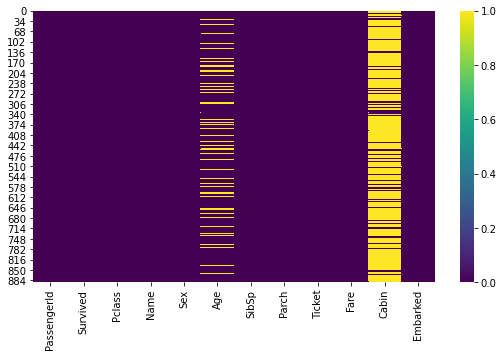

In [7]:
plt.figure(figsize=(9,5))
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

In [8]:
df.drop('Cabin',axis=1,inplace=True)
df['Age'].fillna(value=df['Age'].mean(),inplace=True)


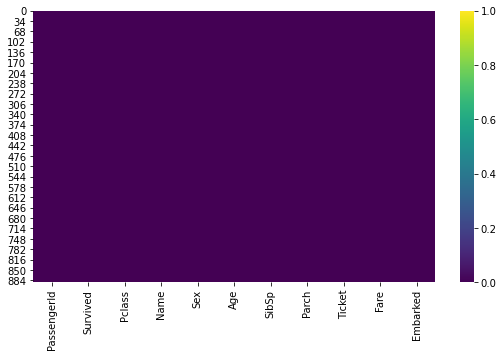

In [9]:
plt.figure(figsize=(9,5))
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

### Data Exploration

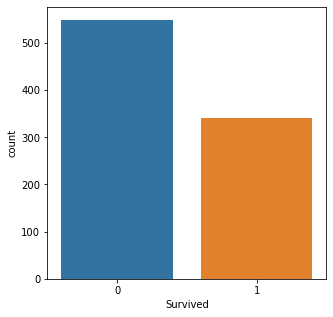

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=df)
plt.show()

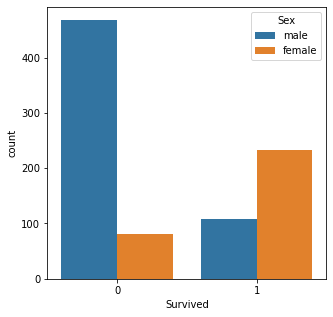

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(x='Survived',data=df,hue='Sex')
plt.show()

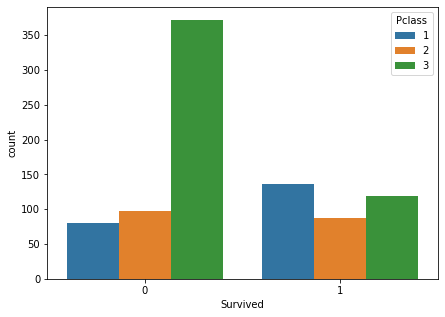

In [26]:
plt.figure(figsize=(7,5))
sns.countplot(x='Survived',data=df,hue='Pclass')
plt.show()

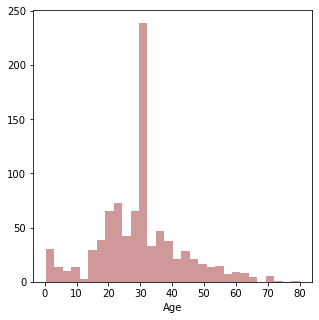

In [28]:
plt.figure(figsize=(5,5))
sns.distplot(df['Age'],kde=False,bins=30,color='darkred')
plt.show()

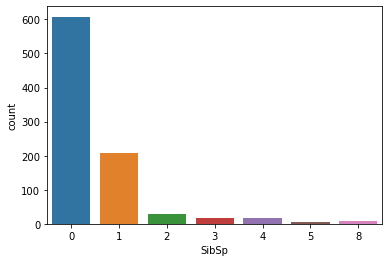

In [30]:
sns.countplot(x='SibSp',data=df)
plt.show()

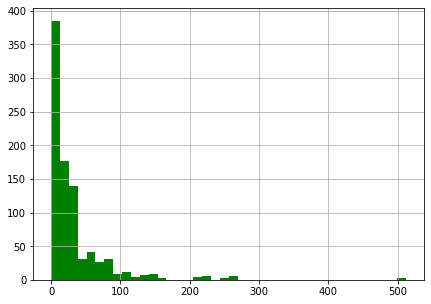

In [38]:
df['Fare'].hist(color='green',bins=40,figsize=(7,5))
plt.show()

### Converting Categorical Features

In [80]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)
df1=pd.concat([df,sex,embark],axis=1)
df1.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [81]:
df1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
0,1,0,3,22.0,1,0,7.2500,NaN,1,0,1
1,2,1,1,38.0,1,0,71.2833,C85,0,0,0
2,3,1,3,26.0,0,0,7.9250,NaN,0,0,1
3,4,1,1,35.0,1,0,53.1000,C123,0,0,1
4,5,0,3,35.0,0,0,8.0500,NaN,1,0,1


## Building a Logistic Regression Model


### Train Test Split

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1.drop('Survived',axis=1),df1['Survived'],test_size=0.30,random_state=101)

### Training and Predicting

In [70]:
from sklearn.linear_model import LogisticRegression


In [71]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

C:\Users\91766\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [72]:
predictions=logmodel.predict(x_test)

### Evaluation

In [73]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report

In [76]:
print('accuracy : {}'.format(accuracy_score(y_test,predictions)))
print('precision_score : {}'.format(precision_score(y_test,predictions)))
print('recall_score : {}'.format(recall_score(y_test,predictions)))
print(classification_report(y_test,predictions))

accuracy : 0.7686567164179104
precision_score : 0.782608695652174
recall_score : 0.631578947368421
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268

